In [1]:
import numpy as np
import pandas as pd

# Fermat's Little Theorem

## Main statement

If p is prime => for any integer a: a^p = a mod p.

In [2]:
a = np.arange(1,50)
p = 11
flt_df = pd.DataFrame(a, columns=["a"])

In [3]:
flt_df["mod"] = flt_df["a"] % p
flt_df["pow"] = pow(flt_df["a"], p)
flt_df["pow_mod"] = flt_df["pow"] % p

In [4]:
flt_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
a,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
mod,1,2,3,4,5,6,7,8,9,10,...,7,8,9,10,0,1,2,3,4,5
pow,1,2048,177147,4194304,48828125,362797056,1977326743,8589934592,31381059609,100000000000,...,419430400000000000,550329031716248441,717368321110468608,929293739471222707,1196683881290399744,1532278301220703125,1951354384207722496,2472159215084012303,3116402981210161152,3909821048582988049
pow_mod,1,2,3,4,5,6,7,8,9,10,...,7,8,9,10,0,1,2,3,4,5


In [5]:
flt_df["mod"].equals(flt_df["pow_mod"])

True

<AxesSubplot:>

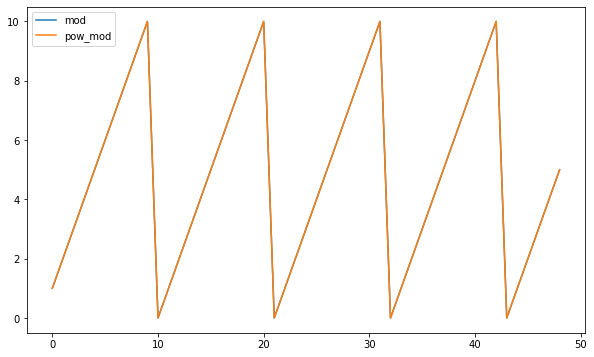

In [6]:
# Graph shows that pow_mod value oscillate the same way like mod value

flt_df[["mod", "pow_mod"]].plot(figsize=(10,6))

## Equivalent statement

If p is prime => for any integer a, a mod p != 0: a^(p-1) = 1 mod p.

In [7]:
a = np.arange(1,25)
p = 7
flt2_df = pd.DataFrame(a, columns=["a"])

In [8]:
flt2_df["not_divisor"] = flt2_df["a"] % p != 0
flt2_df["pow_decr"] = pow(flt2_df["a"], p-1)
flt2_df["pow_decr_mod"] = flt2_df["pow_decr"] % p

In [9]:
flt2_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
a,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
not_divisor,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,False,True,True,True
pow_decr,1,64,729,4096,15625,46656,117649,262144,531441,1000000,...,11390625,16777216,24137569,34012224,47045881,64000000,85766121,113379904,148035889,191102976
pow_decr_mod,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1


In [10]:
bools = {1: True, 0: False}
flt2_df["pow_decr_mod"].replace(bools).equals(flt2_df["not_divisor"])

True

<AxesSubplot:>

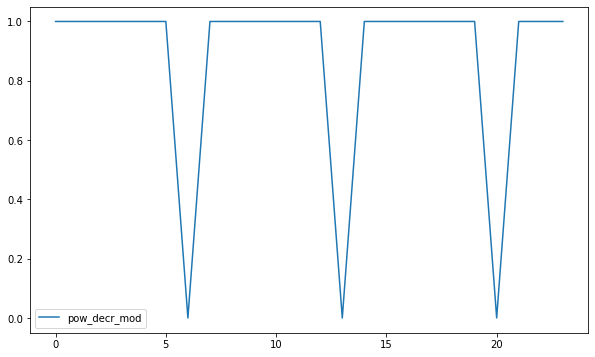

In [11]:
# Graph shows that pow_decr_mod equals 1 if a divisible by p.
# And pow_decr_mod equals 0 if a not divisible by p.

flt2_df[["pow_decr_mod"]].plot(figsize=(10,6))

# Euler function

Euler function F(n) shows amount of numbers co-prime with n.

In [12]:
def coprime(x, y) -> bool:
    imin = min(x, y)
    imax = max(x, y)
    if imin == 1:
        return True
    for i in range(2, imin+1):
        if imin % i != 0:
            continue
        if imax % i == 0:
            return False
    return True

In [13]:
def euler(n) -> int:
    res = 1
    for i in range(2, n):
        if coprime(i, n):
            res += 1
    return res

In [14]:
n = np.arange(1,1000)
euler_df = pd.DataFrame(n, columns=["n"])

In [15]:
euler_df["euler"] = euler_df["n"].apply(euler)

In [16]:
euler_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
n,1,2,3,4,5,6,7,8,9,10,...,990,991,992,993,994,995,996,997,998,999
euler,1,1,2,2,4,2,6,4,6,4,...,240,990,480,660,420,792,328,996,498,648


<AxesSubplot:xlabel='n', ylabel='euler'>

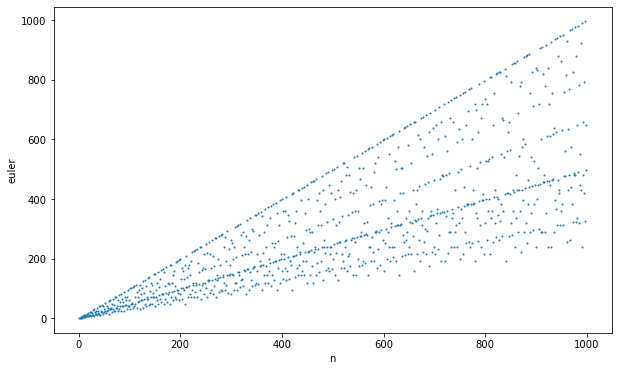

In [17]:
euler_df.plot.scatter(x="n", y="euler", s=1, figsize=(10,6))